# PART B
- **DOMAIN**: Entertainment
- **CONTEXT**: Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription
basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on
the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer
vision and multimedia experts who need to detect faces from screen shots from the movie scene.
The data labelling is already done. Since there higher time complexity is involved in the
- **DATA DESCRIPTION**: The dataset comprises of face images.
- **PROJECT OBJECTIVE**: To create an image dataset to be used by AI team build an image classifier data. Profile images of people are given.

In [1]:
# Importing Key Libraries

import numpy as np

import pandas as pd

#

import warnings; warnings.simplefilter('ignore')

#
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

#
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import random
random.seed(0)

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
file_path = 'C:/Users/aanand1/Python_Intro/Computer Vision/Project/'
images_zip_path = file_path + 'training_images-20211126T092819Z-001.zip'

from zipfile import ZipFile
# Open the zip file
with ZipFile(images_zip_path, 'r') as zip_ref:
    # Extract all the contents into the specified directory
    zip_ref.extractall(file_path)

In [3]:
import random
random.seed(0)
import os,cv2,keras
import tensorflow as tf
import os
import glob
image_path = file_path + 'training_images/'
data_path = os.path.join(image_path,'*g')
files = glob.glob(data_path)
data = []  # EMPTY LIST
for file in files:
    img = cv2.imread(file)
    data.append(img)

In [4]:
len(data)

1091

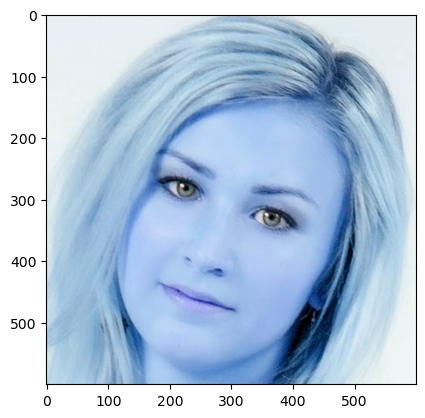

In [5]:
import random
n=random.randint(0,1090)
plt.imshow(data[n])
plt.show()

In [6]:
data[n]

array([[[232, 239, 242],
        [232, 239, 242],
        [232, 239, 242],
        ...,
        [229, 236, 239],
        [229, 236, 239],
        [229, 236, 239]],

       [[232, 239, 242],
        [232, 239, 242],
        [232, 239, 242],
        ...,
        [229, 236, 239],
        [229, 236, 239],
        [229, 236, 239]],

       [[232, 239, 242],
        [232, 239, 242],
        [232, 239, 242],
        ...,
        [229, 236, 239],
        [229, 236, 239],
        [229, 236, 239]],

       ...,

       [[199, 220, 228],
        [194, 216, 227],
        [188, 212, 224],
        ...,
        [240, 245, 246],
        [240, 245, 246],
        [240, 245, 246]],

       [[198, 219, 227],
        [193, 215, 226],
        [188, 212, 224],
        ...,
        [240, 245, 246],
        [240, 245, 246],
        [240, 245, 246]],

       [[198, 219, 227],
        [193, 215, 226],
        [188, 212, 224],
        ...,
        [240, 245, 246],
        [240, 245, 246],
        [240, 245, 246]]

In [7]:
dir = next(os.walk(image_path))[2]
cascPath = file_path + 'haarcascade_frontalface_default.xml'

In [8]:
X=[]
Y=[]
H=[]
W=[]
num_face=[]
image_name=[]

In [9]:
for i in range (len(dir)):
  # Detect Faces
  face_cascade=cv2.CascadeClassifier(cascPath)
  data_path = os.path.join(image_path,dir[i])
  img=cv2.imread(data_path)
  faces=face_cascade.detectMultiScale(
      img,
      scaleFactor=1.1,
      minNeighbors=5,
      flags=cv2.CASCADE_SCALE_IMAGE
      )
  count=0

  for x,y,w,h in faces:
    # Draw rectangle around the face
    img=cv2.rectangle(img,(x,y),(x+w,y+h),(255, 255, 255),3)
    count=count+1
    #resize=cv2.resize(img,(int(img.shape[1]/2),int(img.shape[0])))

  length=len(faces)
  if length==0:
    x1=0
    y1=0
    w1=0
    h1=0
    count=0
    name=dir[i]

  else:
    x1=faces[0,0]
    y1=faces[0,1]
    w1=faces[0,2]
    h1=faces[0,3]
    name=dir[i]


  X.append(x1)
  Y.append(y1)
  W.append(w1)
  H.append(h1)
  num_face.append(count)
  image_name.append(name)

In [10]:
df = pd.DataFrame({'x':X,'y':Y,'w':W,'h':H,'Total_Faces':num_face,'Image_Name':image_name})

df.head(50)
df.shape

,x,y,w,h,Total_Faces,Image_Name
0,146,140,428,428,1,real_00001.jpg
1,80,140,436,436,1,real_00002.jpg
2,33,121,362,362,1,real_00003.jpg
3,134,173,356,356,1,real_00004.jpg
4,0,0,0,0,0,real_00005.jpg
5,61,62,472,472,1,real_00006.jpg
6,0,0,0,0,0,real_00007.jpg
7,253,217,245,245,2,real_00008.jpg
8,0,0,0,0,0,real_00009.jpg
9,17,84,448,448,1,real_00010.jpg


(1091, 6)

In [11]:
df.to_csv(file_path + "face_data.csv")